# Heart-Disease-Prediction

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_781b004b54474bea30ee7e26faffc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_781b004b54474bea30ee7e26faffc.get_object(Bucket='heartdiseaseprediction-donotdelete-pr-vrnebhs6kxydom',Key='Heart_Disease_Prediction.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
df.shape

(270, 14)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [12]:
lbl = df['Heart Disease']
df.drop('Heart Disease',axis = 1, inplace = True)

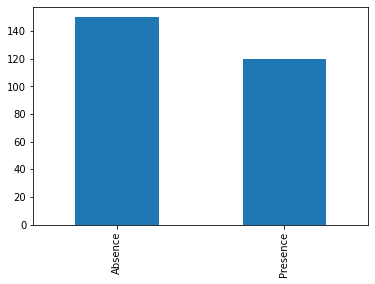

In [13]:
lbl.value_counts().plot(kind = 'bar')

In [14]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
dtype: object

In [15]:
categorial_features = ['Sex','Chest pain type','FBS over 120','EKG results','Exercise angina','Slope of ST','Number of vessels fluro','Thallium']
df[categorial_features] = df[categorial_features].astype('category')

In [16]:
df.dtypes

Age                           int64
Sex                        category
Chest pain type            category
BP                            int64
Cholesterol                   int64
FBS over 120               category
EKG results                category
Max HR                        int64
Exercise angina            category
ST depression               float64
Slope of ST                category
Number of vessels fluro    category
Thallium                   category
dtype: object

In [17]:
continous_features = set(df.columns)-set(categorial_features)
scaler = StandardScaler()
df_norm = df.copy()
df_norm[list(continous_features)] = scaler.fit_transform(df[list(continous_features)])

In [18]:
df_norm_dummies = pd.get_dummies(df_norm)

In [19]:
df_norm_dummies

,Age,BP,Cholesterol,Max HR,ST depression,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,1.382140,-0.916759,6.093004,0.446409,0.481153,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,2.280369,-0.981951,0.532904,-0.481153,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
266,-1.147506,-0.636310,0.258589,1.008625,-0.918565,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
267,0.172309,0.485490,0.859476,0.143677,0.218706,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
268,0.282294,0.485490,-1.117635,-0.072560,-0.568636,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(df_norm_dummies,lbl,test_size = 0.15, stratify = lbl,random_state = 10) 

## Model Evaluation

In [22]:
models = [SVC(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier()]

SVC()


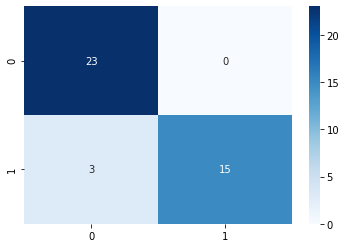

              precision    recall  f1-score   support

     Absence       0.88      1.00      0.94        23
    Presence       1.00      0.83      0.91        18

    accuracy                           0.93        41
   macro avg       0.94      0.92      0.92        41
weighted avg       0.94      0.93      0.93        41

LogisticRegression()


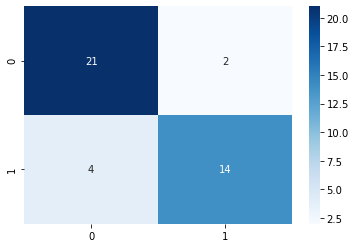

              precision    recall  f1-score   support

     Absence       0.84      0.91      0.87        23
    Presence       0.88      0.78      0.82        18

    accuracy                           0.85        41
   macro avg       0.86      0.85      0.85        41
weighted avg       0.86      0.85      0.85        41

GaussianNB()


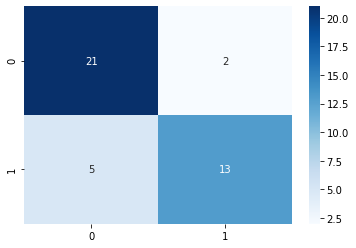

              precision    recall  f1-score   support

     Absence       0.81      0.91      0.86        23
    Presence       0.87      0.72      0.79        18

    accuracy                           0.83        41
   macro avg       0.84      0.82      0.82        41
weighted avg       0.83      0.83      0.83        41

DecisionTreeClassifier()


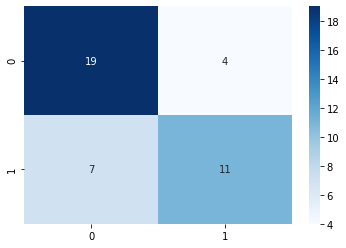

              precision    recall  f1-score   support

     Absence       0.73      0.83      0.78        23
    Presence       0.73      0.61      0.67        18

    accuracy                           0.73        41
   macro avg       0.73      0.72      0.72        41
weighted avg       0.73      0.73      0.73        41



In [23]:
for model in models:
    print(model)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(Y_test, y_pred),annot = True, cmap = plt.cm.Blues)
    plt.show()
    print(classification_report(Y_test, y_pred))

### Support Vector Machine Classifier Model has 93% of accuracy which is greater than the other Model

## Lets try Dimensionality Reduction and correlation b/w features

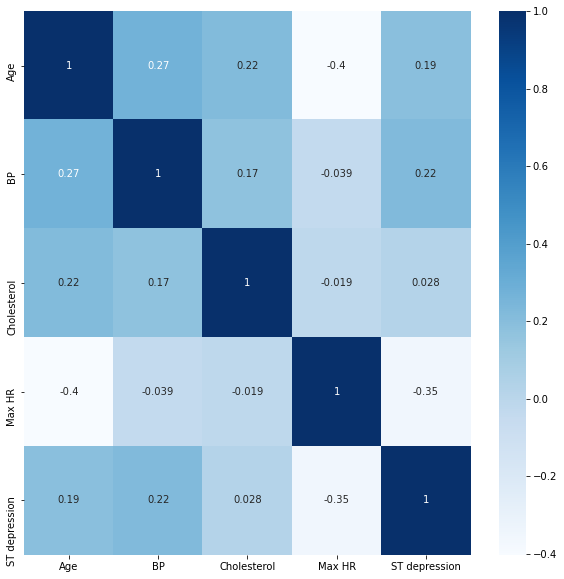

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df_norm.corr(),cmap = plt.cm.Blues,annot = True)

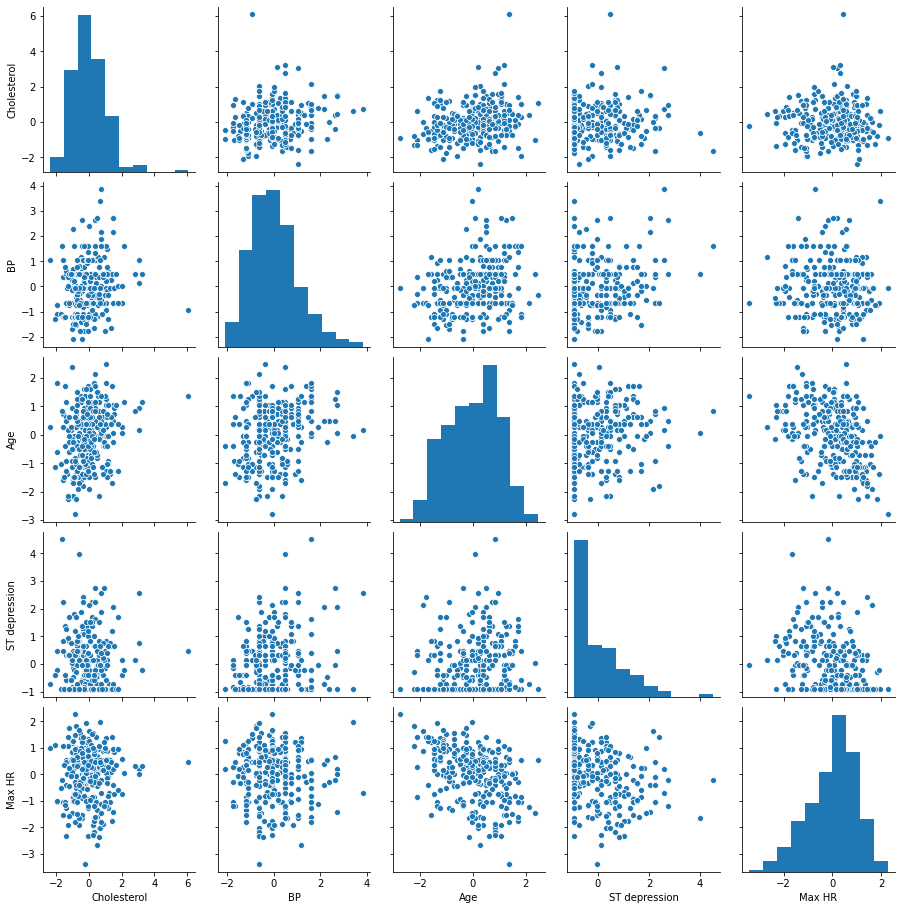

In [30]:
#pair element plotting
sns.pairplot(df_norm[continous_features])


## A weak correlation between Age and Cholestral or BP and ST Depression

In [32]:
# Dimensionality Reduction

In [33]:
n_dimensions = [i for i in range(2,len(df.columns))]

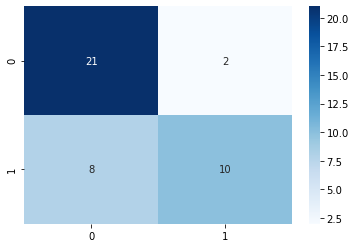

              precision    recall  f1-score   support

     Absence       0.72      0.91      0.81        23
    Presence       0.83      0.56      0.67        18

    accuracy                           0.76        41
   macro avg       0.78      0.73      0.74        41
weighted avg       0.77      0.76      0.75        41



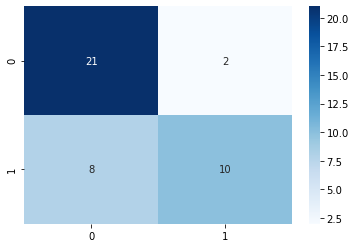

              precision    recall  f1-score   support

     Absence       0.72      0.91      0.81        23
    Presence       0.83      0.56      0.67        18

    accuracy                           0.76        41
   macro avg       0.78      0.73      0.74        41
weighted avg       0.77      0.76      0.75        41



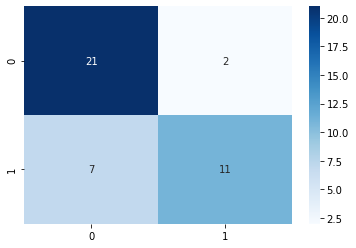

              precision    recall  f1-score   support

     Absence       0.75      0.91      0.82        23
    Presence       0.85      0.61      0.71        18

    accuracy                           0.78        41
   macro avg       0.80      0.76      0.77        41
weighted avg       0.79      0.78      0.77        41



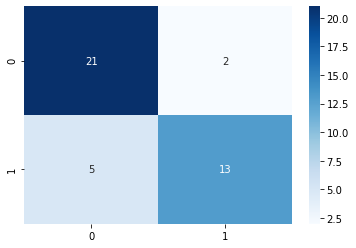

              precision    recall  f1-score   support

     Absence       0.81      0.91      0.86        23
    Presence       0.87      0.72      0.79        18

    accuracy                           0.83        41
   macro avg       0.84      0.82      0.82        41
weighted avg       0.83      0.83      0.83        41



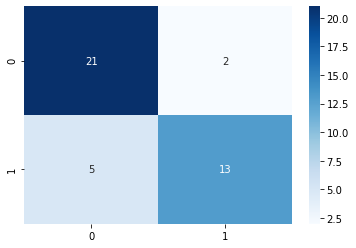

              precision    recall  f1-score   support

     Absence       0.81      0.91      0.86        23
    Presence       0.87      0.72      0.79        18

    accuracy                           0.83        41
   macro avg       0.84      0.82      0.82        41
weighted avg       0.83      0.83      0.83        41



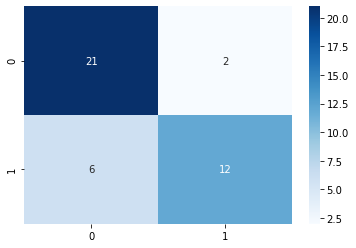

              precision    recall  f1-score   support

     Absence       0.78      0.91      0.84        23
    Presence       0.86      0.67      0.75        18

    accuracy                           0.80        41
   macro avg       0.82      0.79      0.79        41
weighted avg       0.81      0.80      0.80        41



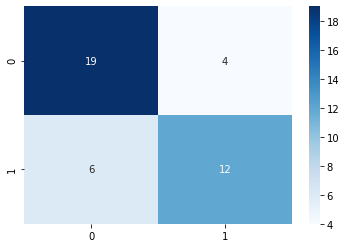

              precision    recall  f1-score   support

     Absence       0.76      0.83      0.79        23
    Presence       0.75      0.67      0.71        18

    accuracy                           0.76        41
   macro avg       0.76      0.75      0.75        41
weighted avg       0.76      0.76      0.75        41



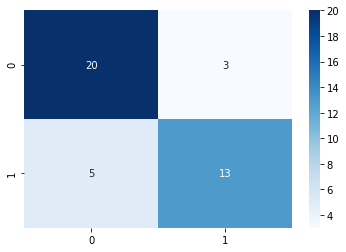

              precision    recall  f1-score   support

     Absence       0.80      0.87      0.83        23
    Presence       0.81      0.72      0.76        18

    accuracy                           0.80        41
   macro avg       0.81      0.80      0.80        41
weighted avg       0.81      0.80      0.80        41



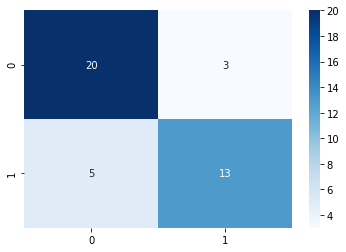

              precision    recall  f1-score   support

     Absence       0.80      0.87      0.83        23
    Presence       0.81      0.72      0.76        18

    accuracy                           0.80        41
   macro avg       0.81      0.80      0.80        41
weighted avg       0.81      0.80      0.80        41



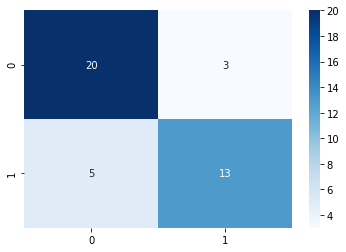

              precision    recall  f1-score   support

     Absence       0.80      0.87      0.83        23
    Presence       0.81      0.72      0.76        18

    accuracy                           0.80        41
   macro avg       0.81      0.80      0.80        41
weighted avg       0.81      0.80      0.80        41



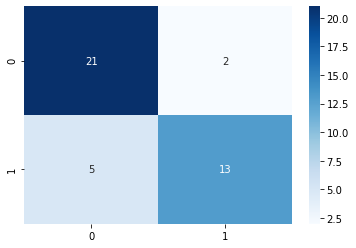

              precision    recall  f1-score   support

     Absence       0.81      0.91      0.86        23
    Presence       0.87      0.72      0.79        18

    accuracy                           0.83        41
   macro avg       0.84      0.82      0.82        41
weighted avg       0.83      0.83      0.83        41



In [36]:
for dimension in n_dimensions:
    pca = PCA(dimension)
    df_norm_reduc = pd.DataFrame(pca.fit_transform(df_norm),columns = [i for i in range(dimension)])
    X_train,X_test,Y_train,Y_test = train_test_split(pd.get_dummies(df_norm_reduc),lbl,test_size=0.15,stratify=lbl,random_state=10)
    model = LogisticRegression()
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(Y_test,y_pred),annot = True, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(Y_test,y_pred))

### Even after running PCA and with different dimensions, the accuracy score is not get closer to the SVC Model